<a href="https://colab.research.google.com/github/Gaurav-160/1stOneHere/blob/main/Exp3_21EC39010_21EC39046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

Reading Images

In [ ]:
images = []

for j in range(9):
    img = cv2.imread(f'c{j + 1}.png', cv2.IMREAD_GRAYSCALE)  # Load directly in grayscale
    images.append(img)

z = pd.read_csv('z-dimension.csv')

Show Images

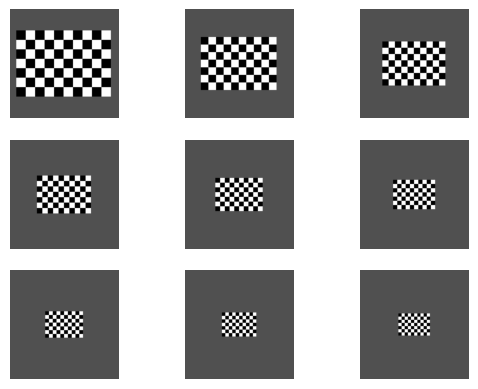

In [ ]:
for i, img in enumerate(images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis("off")

plt.show()

Detecting 4 corners of the image and two other points by setting intensity thresholds

In [ ]:
def detect(data, x, y):
    height, width = data.shape

    if (x, y) == (0, 0):  # Top-left dark corner
        for i in range(height):
            for j in range(width):
                if data[i, j] < 30:
                    return i, j

    elif (x, y) == (0, 1):  # Top-right bright corner
        for i in range(height):
            for j in reversed(range(width)):  # Start from right
                if data[i, j] > 190:
                    return i, j

    elif (x, y) == (1, 0):  # Bottom-left dark corner
        for i in reversed(range(height)):  # Start from bottom
            for j in range(width):
                if data[i, j] < 30:
                    return i, j

    elif (x, y) == (1, 1):  # Bottom-right bright corner
        for i in reversed(range(height)):  # bottom
            for j in reversed(range(width)):  # right
                if data[i, j] > 190:
                    return i, j

    elif (x, y) == (0, -1):  # Any bright pixel in the top-left region
        for i in range(height):
            for j in range(width):
                if data[i, j] > 190:
                    return i, j

    elif (x, y) == (-1, 0):  # Any bright pixel in the leftmost column
        for j in range(width):
            for i in range(height):
                if data[i, j] > 190:
                    return i, j

    return None  # Return None if no point is found

Define world coordinates of 6 points on image

In [ ]:
# X = np.array([0, 250, 0, 250, 25, 0])
# Y = np.array([0, 0, 175, 175, 0, 25])

X = np.array([0, 250, 0, 250, 25, 0])
Y = np.array([0, 0, 150, 150, 0, 25])

for x, y in zip(X, Y):
    print(f"({x}, {y})")

(0, 0)
(250, 0)
(0, 150)
(250, 150)
(25, 0)
(0, 25)


In [ ]:
Z = np.zeros((9,))

for i in range(9):
  Z[i] = z.iloc[i,1]

Calculate Image Points and Use SVD to calculate camera matrix

In [ ]:
U = np.zeros(6)
V = np.zeros(6)
M = []

for k in range(9):
    data = images[k]

    detected_points = [(0, 0), (0, 1), (1, 0), (1, 1), (0, -1), (-1, 0)]

    for i, (x, y) in enumerate(detected_points):
        V[i], U[i] = detect(data, x, y)

    # Construct the 12x12 matrix A
    A = np.zeros((12, 12))

    for i in range(6):
        A[2 * i, :4] = [X[i], Y[i], Z[k], 1]
        A[2 * i + 1, 4:8] = [X[i], Y[i], Z[k], 1]

        A[2 * i, 8:] = -U[i] * np.array([X[i], Y[i], Z[k], 1])
        A[2 * i + 1, 8:] = -V[i] * np.array([X[i], Y[i], Z[k], 1])

    # svd
    u, s, vh = np.linalg.svd(A, full_matrices=True)

    # Extract the last row of Vh and reshape it into a 3x4 matrix
    # print(vh[:,-1])
    # print(vh[-1])
    camera_matrix = np.reshape(vh[:,-1], (3, 4))
    print(camera_matrix)
    M.append(camera_matrix)

    print(f"\nImage points for Image c{k+1}:")
    for i in range(len(U)):
        print(f"Point {i+1}: ({U[i]}, {V[i]})")


[ 2.18750439e-03  8.43590203e-04 -8.67821053e-04 -1.00422016e-06
 -4.50801966e-06  1.53754455e-06  1.58632520e-06 -3.99667940e-07
  1.13769423e-06 -1.72036715e-03  9.94619017e-01  1.03555784e-01]
[[-1.52585067e-15  3.22655165e-16 -1.84512287e-07  7.38049148e-05]
 [-6.96253881e-17 -1.42892886e-15  2.48655126e-03 -9.94620503e-01]
 [-1.03921105e-19  3.50297107e-19 -2.58889461e-04  1.03555784e-01]]

Image points for Image c1:
Point 1: (59.0, 201.0)
Point 2: (947.0, 201.0)
Point 3: (59.0, 822.0)
Point 4: (947.0, 822.0)
Point 5: (148.0, 201.0)
Point 6: (59.0, 290.0)
[ 1.84924965e-03  6.19823056e-04 -4.42786533e-04 -4.82964514e-07
 -3.86545344e-06  1.16555041e-06  1.32301320e-06 -3.02802214e-07
  9.05543285e-07 -1.63704517e-03  9.99982630e-01  5.29719253e-03]
[[ 5.30708643e-16 -3.24763606e-16 -1.51660362e-07  7.58301812e-05]
 [-4.27321730e-17  4.07328297e-16 -1.99996793e-03  9.99983967e-01]
 [-6.97446128e-20 -4.17023907e-19 -1.05943851e-05  5.29719253e-03]]

Image points for Image c2:
Point 1

In [ ]:
for i in range(9):
  print(f"\nThe Camera matrix for Image c{i + 1} is :")
  print(M[i])


The Camera matrix for Image c1 is :
[[-1.52585067e-15  3.22655165e-16 -1.84512287e-07  7.38049148e-05]
 [-6.96253881e-17 -1.42892886e-15  2.48655126e-03 -9.94620503e-01]
 [-1.03921105e-19  3.50297107e-19 -2.58889461e-04  1.03555784e-01]]

The Camera matrix for Image c2 is :
[[ 5.30708643e-16 -3.24763606e-16 -1.51660362e-07  7.58301812e-05]
 [-4.27321730e-17  4.07328297e-16 -1.99996793e-03  9.99983967e-01]
 [-6.97446128e-20 -4.17023907e-19 -1.05943851e-05  5.29719253e-03]]

The Camera matrix for Image c3 is :
[[-1.05140020e-15  1.96462670e-16  2.16058887e-07 -1.29635332e-04]
 [ 1.60868003e-17 -1.12565512e-15  1.66277073e-03 -9.97662440e-01]
 [ 4.16234810e-20  2.81888748e-19  1.13857371e-04 -6.83144227e-02]]

The Camera matrix for Image c4 is :
[[-3.30379103e-17 -6.24255846e-18 -1.31959647e-07  9.23717531e-05]
 [-1.30938444e-16  1.00335555e-16 -1.42797621e-03  9.99583349e-01]
 [-2.42627238e-19 -3.07359148e-20 -4.11834755e-05  2.88284329e-02]]

The Camera matrix for Image c5 is :
[[-3.53

Calculate Intrinsic Camera Matrix using QR Decomposition


In [ ]:
from scipy import linalg

# Extracting the 3x3 camera calibration matrix by removing the last column (Kt) from P = [KR | Kt]
M_1 = [M[i][:, :-1] for i in range(len(M))]

M_intrinsic = []  # List to store intrinsic matrices

# QR decomposition on each camera matrix
for i, M_i in enumerate(M_1):
    R, Q = linalg.rq(M_i)
    R /= R[2, 2]
    M_intrinsic.append(R)

    print(f"\nIntrinsic Camera Matrix for Image c{i+1}")
    print(R)


Intrinsic Camera Matrix for Image c1
[[-5.94827837e-12 -9.53150113e-13  7.12706830e-04]
 [ 0.00000000e+00  5.51321270e-12 -9.60468319e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Intrinsic Camera Matrix for Image c2
[[ 4.81398675e-11  3.36387062e-11  1.43151642e-02]
 [ 0.00000000e+00 -4.59631111e-11  1.88776217e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Intrinsic Camera Matrix for Image c3
[[ 9.20985738e-12  1.85185651e-12  1.89762757e-03]
 [-0.00000000e+00 -9.92362495e-12  1.46039797e+01]
 [-0.00000000e+00 -0.00000000e+00  1.00000000e+00]]

Intrinsic Camera Matrix for Image c4
[[-6.28228605e-13 -5.21363025e-13  3.20418919e-03]
 [ 0.00000000e+00 -3.86182284e-12  3.46735237e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Intrinsic Camera Matrix for Image c5
[[-1.15724873e-11 -1.52748802e-12  4.66737287e-03]
 [ 0.00000000e+00  8.66901476e-12 -3.90864092e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Intrinsic Camera Matrix for Image c6
[[

Average Camera Matrix

In [ ]:
avg_M = np.zeros(M_intrinsic[0].shape)
for i in range(len(M_intrinsic)):
  avg_M += M_intrinsic[i]

average_M = avg_M/len(M_intrinsic)
print("Average camera:\n")
print(avg_M)

Average camera:

[[-1.44627438e-09 -3.63459567e-10  7.30136027e-02]
 [ 0.00000000e+00  1.93926927e-09  8.59024797e+02]
 [ 0.00000000e+00  0.00000000e+00  9.00000000e+00]]
